In [1]:
import sys
sys.path.insert(0, '/home/shenwanxiang/Research/bidd-clsar/')
from clsar.model.loss import ACALoss, get_best_cliff, get_best_cliff_exp
from clsar.model.model import ACANet_PNA, get_deg  # model
from clsar.feature import Gen39AtomFeatures  # feature
from clsar.dataset import LSSNS  # dataset

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import ticker

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='white',  font='sans-serif', font_scale=2)

In [2]:
LSSNS.names.keys()

dict_keys(['ido1', 'plk1', 'rip2', 'braf', 'usp7', 'phgdh', 'pkci', 'rxfp1', 'mglur2'])

In [3]:
vmin = 0.0
vmax = 5.1

cliffs = list(np.arange(vmin, vmax, 0.1).round(2))
ticks = list(np.arange(vmin, vmax, 0.5).round(2))

gaps = {}
al2 = []
dfs = []
for dataset_name in LSSNS.names.keys():
    dataset = LSSNS(root = './tmpignore', name=dataset_name, 
                    pre_transform=Gen39AtomFeatures())
    l1, l2, df = get_best_cliff_exp(dataset.data.y, cliffs = cliffs)
    df['dataset'] = dataset_name
    l2['dataset'] = dataset_name
    al2.append(l2)
    dfs.append(df)
    
    y = dataset.data.y
    gap = float(y.max()-y.min())
    gaps.update({dataset_name:gap})

Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!


In [4]:
colors = sns.color_palette("jet_r", 9).as_hex()
colors.reverse()

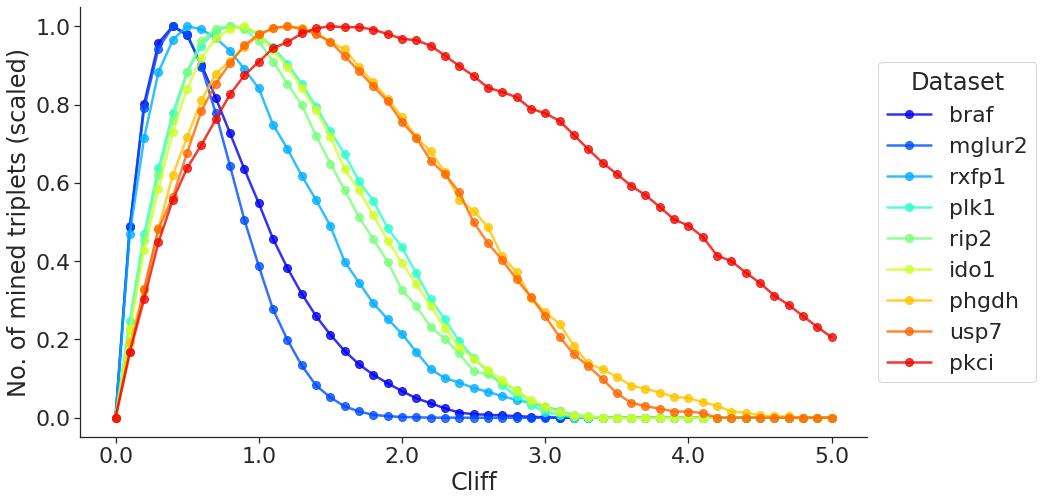

In [5]:
dfp = pd.concat(dfs)
dfn = dfp[dfp.split == 1].set_index(['dataset', 'lower']).trps.unstack().T
dfnp  =  (dfn - dfn.min() ) / (dfn.max() - dfn.min())


sns.set(style='white',font='sans-serif',font_scale=2)

fig, ax = plt.subplots(ncols = 1, figsize = (13, 7.5), sharey=False)

cols = dfnp.idxmax().sort_values().index
dfnp = dfnp[cols]
dfnp.index = dfnp.index.astype(str)

dfnp.plot(ax = ax, color=colors, lw = 2.5, ls = '-',  marker='o', markersize=8, alpha = 0.8)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', title = 'Dataset',bbox_to_anchor=(1, 0.5))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('Cliff')
ax.set_ylabel('No. of mined triplets (scaled)')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()

fig.savefig('./dataset_cliff/cliffs_trps.png', dpi = 300, bbox_inches='tight')
fig.savefig('./dataset_cliff/cliffs_trps.pdf', dpi = 300, bbox_inches='tight')

Text(0.5, 0, '')

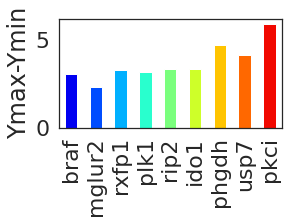

In [8]:
fig, ax = plt.subplots(ncols = 1, figsize = (4, 2), sharey=False)
dfpp = pd.Series(gaps).loc[cols]
dfpp.plot(kind='bar',color = colors, ax=ax)
ax.set_ylabel('Ymax-Ymin')
ax.set_xlabel('')

/tmp/ipykernel_38786/1826367397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp1['trps2'] = dfp1.trps.replace(0, np.nan)
/tmp/ipykernel_38786/1826367397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp1['trps2'] = np.log2(dfp1['trps2'])


2 18
1 21
5 18
4 16
1 14
1 16
0 14
2 14
7 14


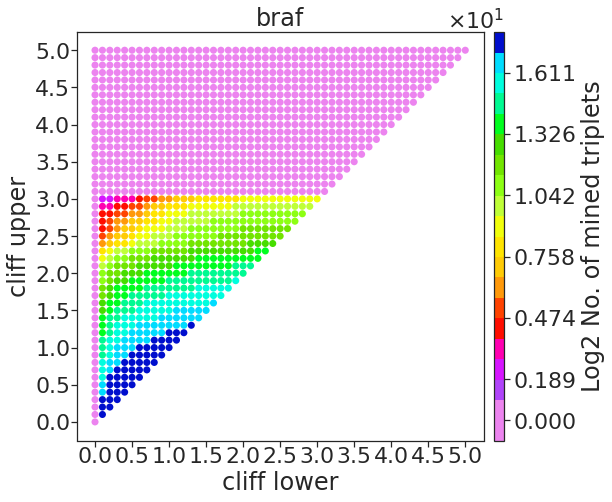

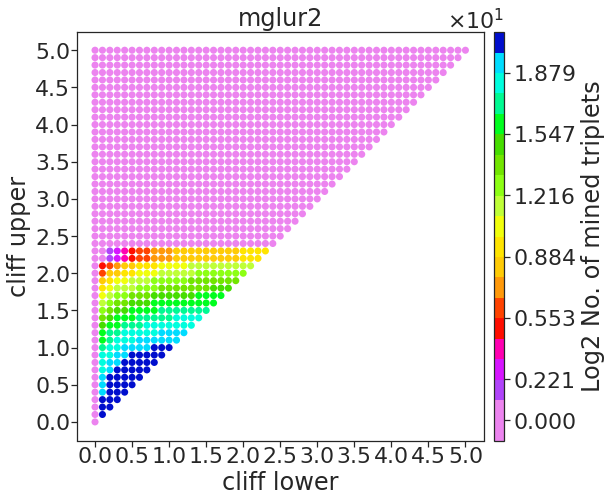

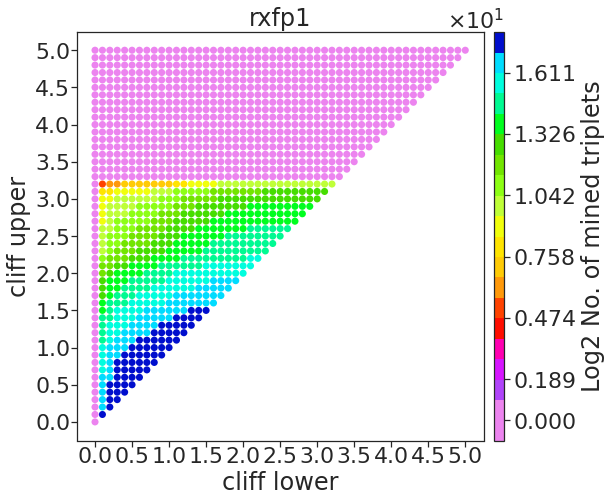

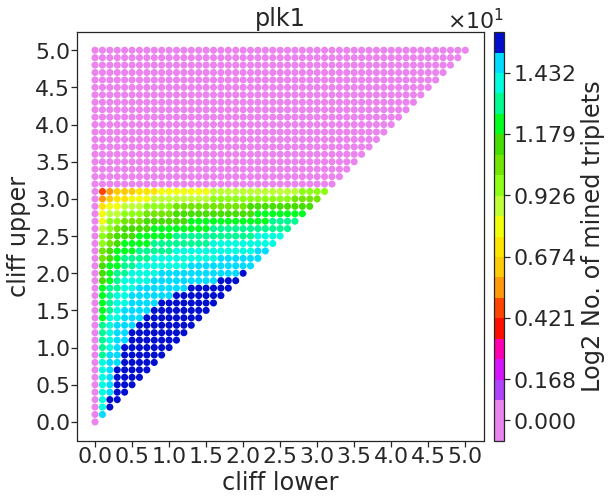

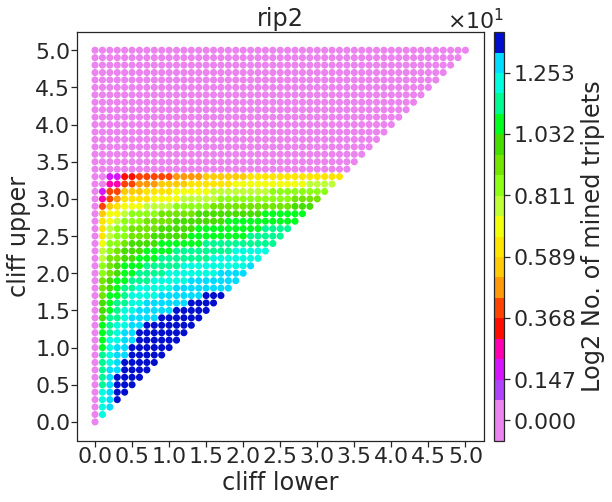

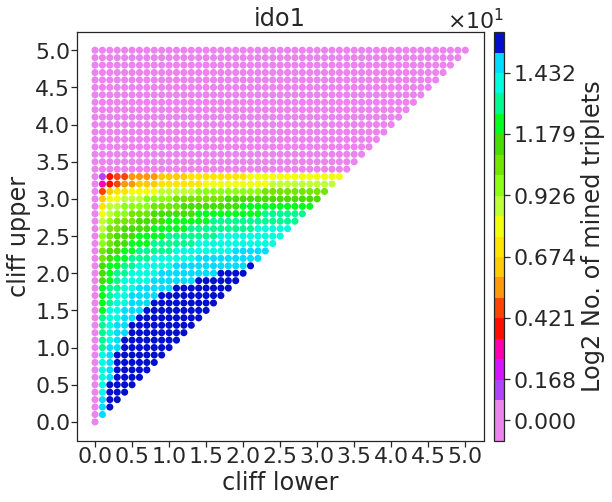

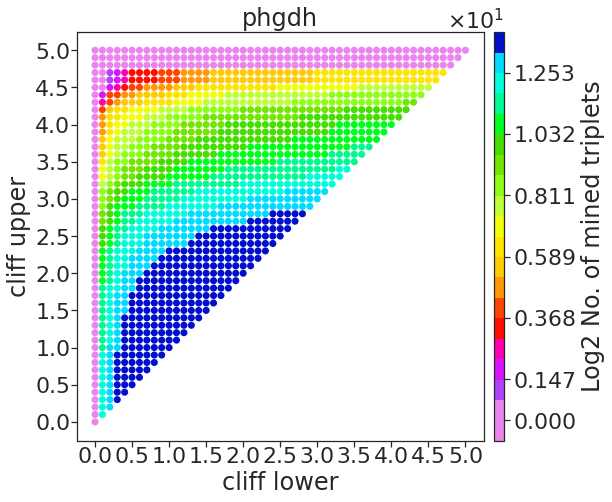

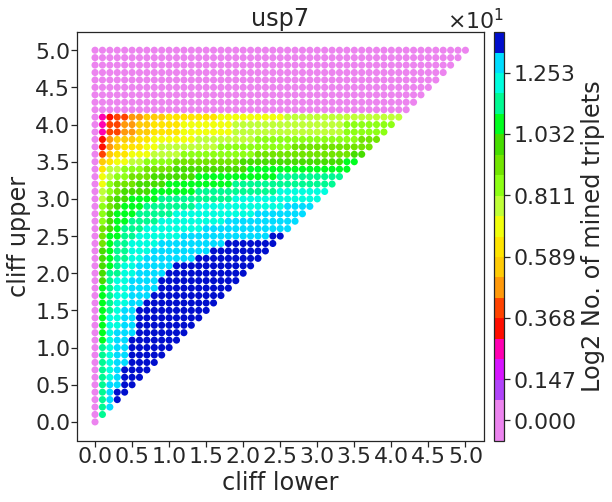

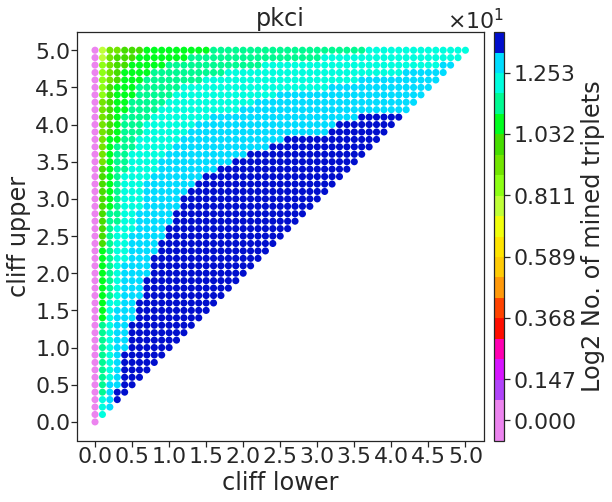

In [9]:
for i, dataset_name in enumerate(cols):
    
    dfp1 = dfp[dfp.dataset == dataset_name]
    dfp1['trps2'] = dfp1.trps.replace(0, np.nan)
    dfp1['trps2'] = np.log2(dfp1['trps2'])

    v = dfp1.trps2.dropna().sort_values().astype(int)
    bds = [0]

    print(v.min(), v.max())

    bds1 = np.linspace(0, v.max(), 20)

    #bds1 = np.logspace(np.log2(v.min()),  np.log2(v.max()), num = 100, base = 2)

    bds.extend(bds1)

    bds = pd.Series(bds).astype(float).to_list()

    base_cmaps = ['Greys', 'gist_ncar_r'] #gist_ncar_r 

    n_base = len(base_cmaps)
    N=[1, len(bds1)]# number of colors  to extract from each cmap, sum(N)=len(classes)
    colors = np.concatenate([plt.get_cmap(name)(np.linspace(0.1, 0.9, N[i])) for i,name in zip(range(n_base),base_cmaps)])
    cmap = ListedColormap(colors)

    boundary_norm = BoundaryNorm(bds, cmap.N)
    

    fig, ax = plt.subplots(figsize=(9, 7.5))
    s = 50
    marker = 'o'
    lw = 0

    im = ax.scatter(x = dfp1.lower, 
                     y = dfp1.upper, #vmax = dfp1.trps.max(), 
                     c = np.log2(dfp1.trps+1), 
                     norm = boundary_norm, #marker = ',',
                     marker = marker,
                     edgecolors='k', 
                     lw=lw, 
                     s = s, cmap= cmap, label = 'trps2')
    
    fmt = ticker.ScalarFormatter(useMathText=True)
    fmt.set_powerlimits((0, 0))
    fmt.format = '$\\mathdefault{%1.2f}$'
    
    # from matplotlib.ticker import FuncFormatter
    # fmt = lambda x, pos: '%d' % x

    #format=FuncFormatter(fmt)
    cbar = fig.colorbar(im, ax=ax, aspect=40, pad = 0.02, format = fmt,)# 
    cbar.set_label('Log2 No. of mined triplets')
    
    # cbar.formatter.set_scientific('%.2e')
    # cbar.formatter.format = '%.2e'
    # cbar.formatter.set_useMathText(True)
    
    #cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2e'))
    
    ax.tick_params(left='off',  bottom='off', pad=.3,)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    ax.set_title(dataset_name)
    
    ax.set_ylabel('cliff upper')
    ax.set_xlabel('cliff lower')
    
    fig.tight_layout()
    fig.savefig('./dataset_cliff/cliff_%s_%s.png' % (str(i).zfill(2), dataset_name), dpi = 300, bbox_inches='tight')

In [10]:
# for i, dataset_name in enumerate(cols):
#     dfp1 = dfp[dfp.dataset == dataset_name]

#     dfp1['trps2'] = dfp1.trps.replace(0, np.nan)

#     v = dfp1.trps2.dropna().sort_values().astype(int)
#     bds = [0]
#     bds1 = np.linspace(v.min(), v.max(), 80)
    
#     #bds1 = np.logspace(np.log2(v.min()),  np.log2(v.max()), num = 100, base = 2)
    
#     bds.extend(bds1)
    
#     bds = pd.Series(bds).astype(float).to_list()
    
#     base_cmaps = ['Greys', 'jet_r']
#     n_base = len(base_cmaps)
#     N=[1, len(bds1)]# number of colors  to extract from each cmap, sum(N)=len(classes)
#     colors = np.concatenate([plt.get_cmap(name)(np.linspace(0.1, 0.9, N[i])) for i,name in zip(range(n_base),base_cmaps)])
#     cmap = ListedColormap(colors)

#     boundary_norm = BoundaryNorm(bds, cmap.N)

#     fig, ax = plt.subplots(figsize=(9, 7.5))
#     im = ax.scatter(x = dfp1.lower, y = dfp1.upper, #vmax = dfp1.trps.max(), 
#                     c = dfp1.trps, norm = boundary_norm, #marker = ',',
#                     edgecolors='k', 
#                     lw=0.01, 
#                     s = 50, cmap= cmap, label = 'trps2')

#     fmt = ticker.ScalarFormatter(useMathText=True)
#     fmt.set_powerlimits((0, 0))
#     #fmt.set_scientific('%1.2f')
#     fmt.format = '$\\mathdefault{%1.2f}$'
#     cbar = fig.colorbar(im, ax=ax, format = fmt, aspect=40, pad = 0.02)
    
    
#     # cbar.formatter.set_scientific('%.2e')
#     # cbar.formatter.format = '%.2e'
#     # cbar.formatter.set_useMathText(True)
    
#     #cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2e'))
    
#     ax.tick_params(left='off',  bottom='off', pad=.3,)
#     ax.set_xticks(ticks)
#     ax.set_yticks(ticks)

#     ax.set_title(dataset_name)
    
#     ax.set_ylabel('cliff upper')
#     ax.set_xlabel('cliff lower')
    
#     fig.tight_layout()
#     fig.savefig('./dataset_cliff/cliff_%s_%s.png' % (str(i).zfill(2), dataset_name), dpi = 300, bbox_inches='tight')